In [1]:
import numpy as np
import pandas as pd
from scipy.stats import binom, beta
from scipy.optimize import minimize
from numpy.random import default_rng
import matplotlib.pyplot as plt

In [2]:
def plotBeta(a,b):
    fig, ax = plt.subplots(1, 1)
    (mean, var) = beta.stats(a,b)
    mode = (a-1)/(a+b -2)
    print(f"mean:{mean}, var:{var}, mode:{mode}")
    x = np.linspace(0, 1, 100)
    ax.plot(x, beta.pdf(x, a, b),
       'r-', lw=5, alpha=0.6, label='beta pdf')

mean:0.5, var:0.022727272727272728, mode:0.5


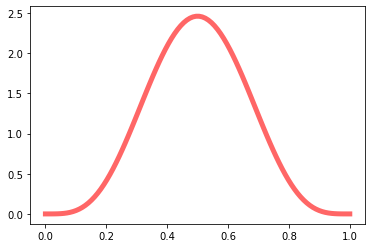

In [3]:
plotBeta(5,5)

## Excercise 3.8

The beta pdf is:

$$ f(\pi)=\frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)}\pi^{\alpha-1} (1-\pi)^{\beta-1} $$

the mean is computed from 

$$ E(\pi) =  \int{\pi f(\pi)} = \int{\frac{\Gamma(\alpha + \beta)}{\Gamma(\alpha)\Gamma(\beta)}\pi^{\alpha} (1-\pi)^{\beta-1}} $$

This is almost the same as the normalization for Beta(alpha+1, beta):
$$\int{\frac{\Gamma(\alpha + \beta + 1)}{\Gamma(\alpha + 1)\Gamma(\beta)}\pi^{\alpha} (1-\pi)^{\beta-1}} = 1 $$

Using this we find 

$$ E(\pi) = \frac{\Gamma(\alpha + \beta) \Gamma(\alpha+1)}{\Gamma(\alpha)\Gamma(\alpha + \beta + 1)} $$

Using the property $\Gamma(z + 1) = z \Gamma(z)$ yields finally:
$$ E(\pi) = \frac{\alpha}{\alpha + \beta} $$

To find the mode, we just find the maximum, setting the derivative of $f(\pi)$ to zero:

$$ (\alpha -1) \pi^{\alpha-2} (1-\pi)^{\beta-1} - (\beta-1) \pi^{\alpha-1} (1-\pi)^{\beta-2} = 0 $$

Multipy through by $\pi^{1-\alpha} (1-\pi)^{1-\beta} $ :

$$ (\alpha -1) \pi^{-1} - (\beta-1)   (1-\pi)^{-1} = 0 $$

solve for $\pi$:

$$ (\alpha -1) (1-\pi)  - (\beta-1)    \pi  = 0 $$

$$ (\alpha -1) - (\alpha+ \beta)\pi + 2 \pi = 0 $$

$$ \pi = \frac{\alpha - 1}{\alpha + \beta -2} $$

 




I am going to skip the variance, i can see how it is done but it will be tedious.

# Excercise 3.11
Exercise 3.11 (Regular bike ridership) A university wants to know what proportion of students are regular bike riders,  
π
 , so that they can install an appropriate number of bike racks. Since the university is in sunny Southern California, staff think that  
π
  has a mean of 1 in 4 students, and a mode of 5/22.
  
a) Specify and plot a Beta model that reflects the staff’s prior ideas about  
π.


b) Among 50 surveyed students, 15 are regular bike riders. What is the posterior model for  
π?

c) What is the mean, mode, and standard deviation of the posterior model?

d) Does the posterior model more closely reflect the prior information or the data? Explain your reasoning.

a ) mean is 1/4 and mode is 5/22 .  By guesswork i get $\alpha = 6$ and $\beta = 18$  

mean:0.25, var:0.0075, mode:0.22727272727272727


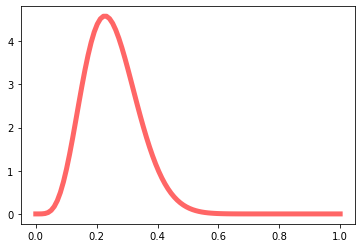

In [17]:
plotBeta(6,18)

b) 50 students surveyed, 15 are regular riders, so teh posterior is :
Beta(6+15, 18+(50-15)) = Beta(21,53)

mean:0.28378378378378377, var:0.002710007304601899, mode:0.2777777777777778


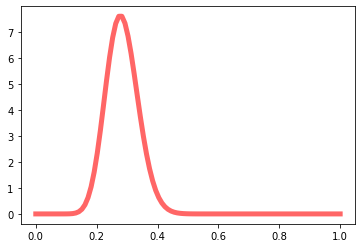

In [18]:
plotBeta(21,53)

c) see above


d). The prior definatly influeces the posteirior here, since only 50 were surveyed and the prior is quite strong. consider the uniform prior ($\alpha = \beta = 1$).

mean:0.3076923076923077, var:0.00401920285809981, mode:0.3


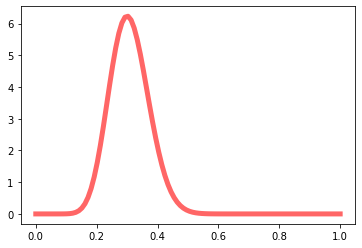

In [19]:
plotBeta(16,36)

So looks like the prior has more impact here on the uncertainty. Interesting

## Excercise 3.13

 (Knowing someone who is transgender) A September 2016 Pew Research survey found that 30% of U.S. adults are aware that they know someone who is transgender.30 It is now the 2020s, and Sylvia believes that the current percent of people who know someone who is transgender,  
π
 , has increased to somewhere between 35% and 60%.
 
a) Identify and plot a Beta model that reflects Sylvia’s prior ideas about  
π.
 
b) Sylvia wants to update her prior, so she randomly selects 200 US adults and 80 of them are aware that they know someone who is transgender. Specify and plot the posterior model for  
π .

c) What is the mean, mode, and standard deviation of the posterior model?

d) Describe how the prior and posterior Beta models compare.

I suspect that the mean should be near 95/2 = 47.5 which is close to half.  I chose $\alpha = \beta = 5$ that includes the values and is still pretty vague

mean:0.5, var:0.022727272727272728, mode:0.5


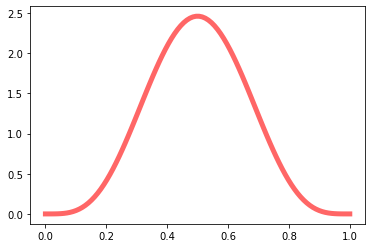

In [26]:
plotBeta(5,5)

b and c) Updating the prior results in the posterior Beta(5+80,5+120)

mean:0.40476190476190477, var:0.0011418469441489077, mode:0.40384615384615385


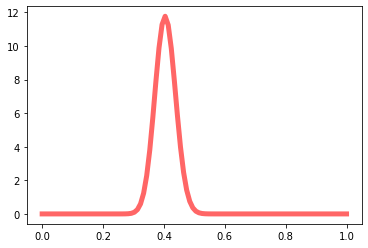

In [23]:
plotBeta(85,125)

In my opinion the prior had minimal impact on the posterior due to the large amount of data. Or perhaps my prior was too loose . Not sure about the priors in these problems

## define some more helper functions

In [53]:
def beta_stats(a, b):
    (mean, var) = beta.stats(a,b)
    mode = (a-1)/(a+b -2)
    return (float(mean), mode,float(var), np.sqrt(var))

def summarize_beta_bin(alpha, beta, y, n):
   (prior_mean, prior_mode, prior_var, prior_std) = beta_stats(alpha, beta)
   (post_mean, post_mode, post_var, post_std) = beta_stats(alpha+y, beta+(n-y))
   return pd.DataFrame({'alpha': [alpha, alpha+y], 'beta': [beta, beta+(n-y)], \
                        'mean': [prior_mean, post_mean], 'mode': [prior_mode, post_mode],\
                       'var': [prior_var, post_var], 'std': [prior_std, post_std]})
    

## Exercise 3.15 

Write the corresponding input code for the summarize_beta_binomial() output below

```
      model alpha beta   mean   mode       var      sd
1     prior     1    2 0.3333 0.0000 0.0555556 0.23570
2 posterior   100    3 0.9709 0.9802 0.0002719 0.01649
```

In [55]:
summarize_beta_bin(1,2,99,100)

,alpha,beta,mean,mode,var,std
0,1,2,0.333333,0.000000,0.055556,0.235702
1,100,3,0.970874,0.980198,0.000272,0.016489


## Plot beta binomial

In [83]:
def plotBetaBinomial(a,b,y,n):
    fig, ax = plt.subplots(1, 1)
    x = np.linspace(0, 1, 100)
    ax.set(xlabel='pi', ylabel='density', title='BetaBinomial')
    ax.grid()
    ax.fill_between(x, 0, beta.pdf(x, a, b), alpha=0.6, label = 'prior')
    ax.fill_between(x, 0, beta.pdf(x, y+1, n-y+1), alpha=0.6, label='likelyhood')
    ax.fill_between(x, 0, beta.pdf(x, y+a, n-y+b), alpha=0.6, label = 'posterior')
    plt.legend(bbox_to_anchor=(1.04,1), loc="upper left")

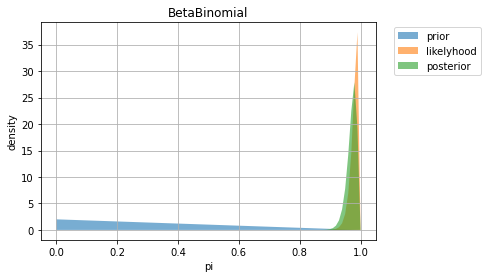

In [84]:
plotBetaBinomial(1,2,99,100)

## Excercise 3.17
See book.

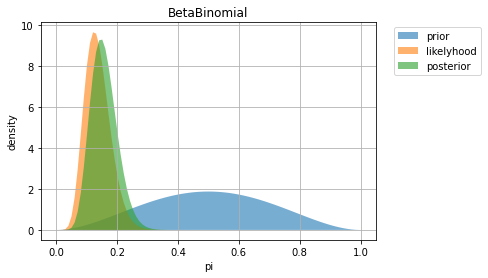

In [85]:
plotBetaBinomial(3,3,8,64)

## Excercise 3.18

a) Patrick has a Beta(3,3) prior for  π
 , the probability that someone in their town attended a protest in June 2020. In their survey of 40 residents, 30 attended a protest. Summarize Patrick’s analysis using summarize_beta_binomial() and plot_beta_binomial().
 
b) Harold has the same prior as Patrick, but lives in a different town. In their survey, 15 out of 20 people attended a protest. Summarize Harold’s analysis using summarize_beta_binomial() and plot_beta_binomial().


c) How do Patrick and Harold’s posterior models compare? Briefly explain what causes these similarities and differences.

In [87]:
summarize_beta_bin(3,3,30,40)

,alpha,beta,mean,mode,var,std
0,3,3,0.500000,0.500000,0.035714,0.188982
1,33,13,0.717391,0.727273,0.004314,0.065678


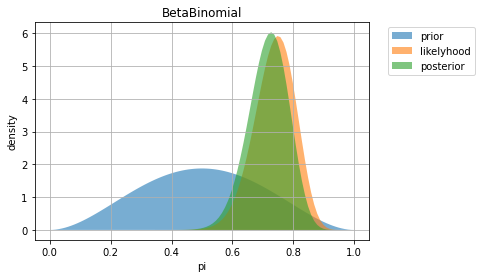

In [88]:
plotBetaBinomial(3,3,30,40)

In [89]:
summarize_beta_bin(3,3,15,20)

,alpha,beta,mean,mode,var,std
0,3,3,0.500000,0.500000,0.035714,0.188982
1,18,8,0.692308,0.708333,0.007890,0.088823


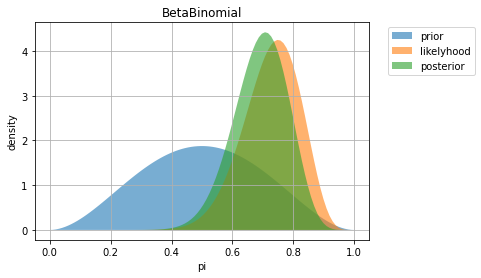

In [90]:
plotBetaBinomial(3,3,15,20)

Not sure what they are looking for here. The posterior models are similar in mean but harolds is wider due to collecting less data.